# Blackwell Customer Demohraphics

#### Abigail Villanueva
#### Updated: 2020.07.24

### The objective of this project is to answer the following questions:
### Task 1
#### 1a) Do customers in different regions spend more per transaction?
#### 1b) Which regions spend the most/least? Is there a relationship between the number of items purchased and amount spent?
#### 2) Is there a relationship between the number of items purchased and amount spent?
### Task 2
#### 3a) Are there differences in the age of customers between regions?
#### 3b) If so, can we predict the age of a customer in a region based on other demographic data?
#### 4a) Is there any correlation between age of a customer and if the transaction was made online or in the store?
#### 4b) Do any other factors predict if a customer will buy online or in our stores?

## Import Packages

In [83]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling   # will need to install at CLI
import seaborn as sb

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.datasets import load_digits

# helpers
%matplotlib inline

# Grahpviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

## Import Data

In [84]:
pwd

'C:\\Users\\PLZ1669\\Desktop\\Data Analytics Certificate Program\\Course One\\Task 2'

In [85]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4AF2-2EB8

 Directory of C:\Users\PLZ1669\Desktop\Data Analytics Certificate Program\Course One\Task 2

07/24/2020  06:19 PM    <DIR>          .
07/24/2020  06:19 PM    <DIR>          ..
07/21/2020  10:40 PM    <DIR>          .ipynb_checkpoints
07/03/2020  02:56 AM            80,397 C1 T2 Memo.docx
07/12/2020  10:59 PM           199,284 custDemoClass.ipynb
06/22/2020  09:40 PM         1,348,525 Demographic_Data.csv
07/17/2020  01:04 AM         8,498,355 Notes.docx
07/17/2020  02:04 AM           433,630 Task 2 - In depth analysis - practice.ipynb
07/24/2020  06:17 PM           746,312 Task 2 Course 2 - Blaclwell Customer Demographics.ipynb
               6 File(s)     11,306,503 bytes
               3 Dir(s)  426,385,973,248 bytes free


In [86]:
data = pd.read_csv('Demographic_Data.csv')
print(data.shape)

(80000, 5)


## Evaluate Data 

In [87]:
# Load digits dataset
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [88]:
# Create feature matrix
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [89]:
# Create target vector
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [90]:
# View the first observation's feature values as a matrix
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

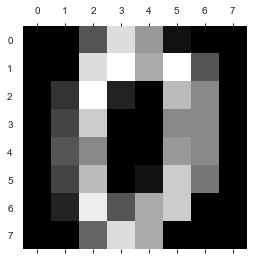

In [91]:
# Visualize the first observation's feature values as an image
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [92]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [93]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


<AxesSubplot:>

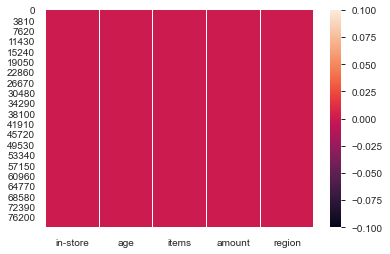

In [94]:
data.info()
sb.heatmap(data.isnull())

In [95]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

## Preprocess

### Duplicates

In [96]:
data.duplicated().any()

True

In [97]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(21, 5)


,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [98]:
data = data.drop_duplicates()
data.duplicated().any()

False

### Null Values

In [99]:
data.isnull().any()

in-store    False
age         False
items       False
amount      False
region      False
dtype: bool

In [100]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


### Discretize

In [101]:
#Discretize Amount
data['Amount($)']=pd.cut(data['amount'],3,labels=['Below 1,000','1,000 to 2,000','Over 2,000'])

data.head(10)

,in-store,age,items,amount,region,Amount($)
0,0,37,4,281.0300,2,"Below 1,000"
1,0,35,2,219.5100,2,"Below 1,000"
2,1,45,3,1525.7000,4,"1,000 to 2,000"
3,1,46,3,715.2500,3,"Below 1,000"
4,1,33,4,1937.5000,1,"1,000 to 2,000"
5,0,24,3,1314.2000,4,"1,000 to 2,000"
6,0,43,6,8.5472,2,"Below 1,000"
7,1,66,5,819.9800,3,"Below 1,000"
8,1,51,5,908.3100,1,"Below 1,000"
9,1,47,3,767.5400,1,"Below 1,000"


In [102]:
#Discretize Age
data['Age'] = pd.cut(data['age'], bins=[18,29,59,85], labels=['<30', '30-59', '60-85'], include_lowest = True)

data.head(10)

,in-store,age,items,amount,region,Amount($),Age
0,0,37,4,281.0300,2,"Below 1,000",30-59
1,0,35,2,219.5100,2,"Below 1,000",30-59
2,1,45,3,1525.7000,4,"1,000 to 2,000",30-59
3,1,46,3,715.2500,3,"Below 1,000",30-59
4,1,33,4,1937.5000,1,"1,000 to 2,000",30-59
5,0,24,3,1314.2000,4,"1,000 to 2,000",<30
6,0,43,6,8.5472,2,"Below 1,000",30-59
7,1,66,5,819.9800,3,"Below 1,000",60-85
8,1,51,5,908.3100,1,"Below 1,000",30-59
9,1,47,3,767.5400,1,"Below 1,000",30-59


## Analyze Data

### Statistical Analysis

In [104]:
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


### Visualizations

In [105]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'Amount($)', 'Age'], dtype='object')


#### Histogram

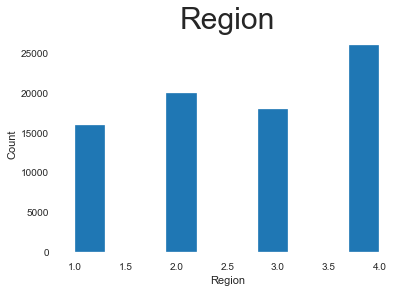

In [106]:
plt.hist(data['region'])

plt.title('Region',fontsize=30)
plt.xlabel('Region')
plt.ylabel('Count')



plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 

plt.show()

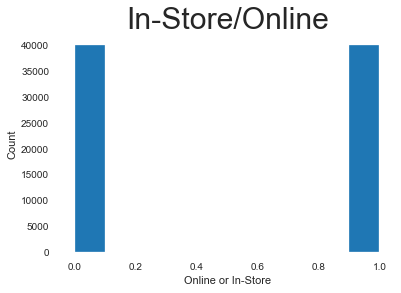

In [107]:
# 1 = In-Store 0 = Online Purchases
plt.hist(data['in-store'])

                    
plt.title('In-Store/Online',fontsize=30)
plt.xlabel('Online or In-Store')
plt.ylabel('Count')



plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 

plt.show()

#### Line Plot

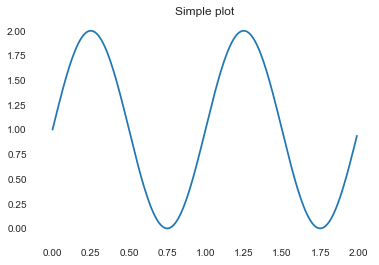

In [108]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
ax.set_title('Simple plot')
plt.show()

#### Scatter Plot

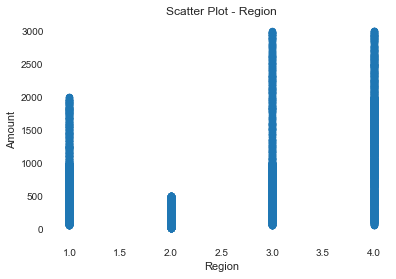

In [109]:
data_sample = data.sample(8000)
x = data_sample["region"]
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title("Scatter Plot - Region")
plt.xlabel("Region")
plt.ylabel("Amount")
plt.show()

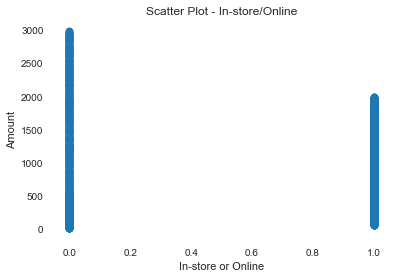

In [110]:
# 1 = In-Store 0 = Online Purchases
data_sample = data.sample(8000)
x = data_sample["in-store"]
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title("Scatter Plot - In-store/Online")
plt.xlabel("In-store or Online")
plt.ylabel("Amount")
plt.show()

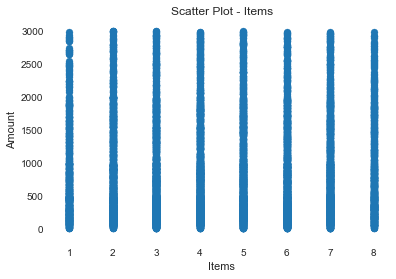

In [111]:
data_sample = data.sample(8000)
x = data_sample["items"]
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title("Scatter Plot - Items")
plt.xlabel("Items")
plt.ylabel("Amount")
plt.show()

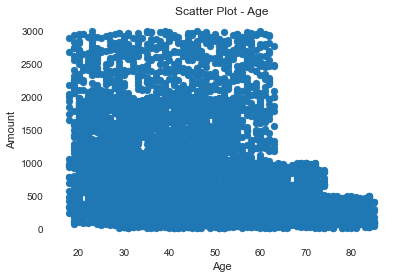

In [112]:
data_sample = data.sample(8000)
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title("Scatter Plot - Age")
plt.ylabel('Amount')
plt.xlabel('Age')
plt.show()


#### Box Plot

Index(['in-store', 'age', 'items', 'amount', 'region', 'Amount($)', 'Age'], dtype='object')


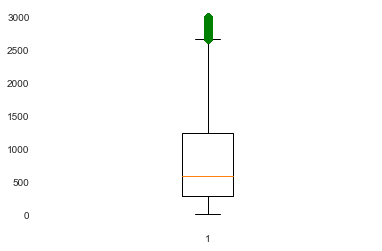

In [113]:
header = data.dtypes.index
print(header)

A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

Index(['in-store', 'age', 'items', 'amount', 'region', 'Amount($)', 'Age'], dtype='object')


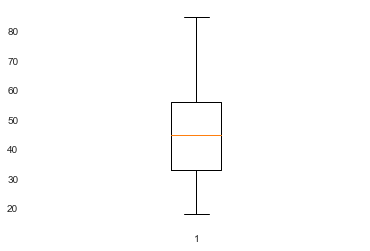

In [114]:
header = data.dtypes.index
print(header)

A = data['age']
plt.boxplot(A,0,'gD')
plt.show()

Index(['in-store', 'age', 'items', 'amount', 'region', 'Amount($)', 'Age'], dtype='object')


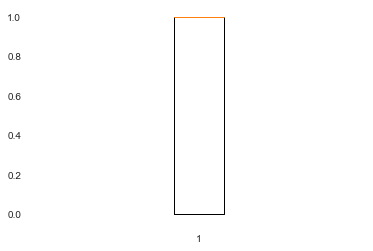

In [115]:
header = data.dtypes.index
print(header)

A = data['in-store']
plt.boxplot(A,0,'gD')
plt.show()

Index(['in-store', 'age', 'items', 'amount', 'region', 'Amount($)', 'Age'], dtype='object')


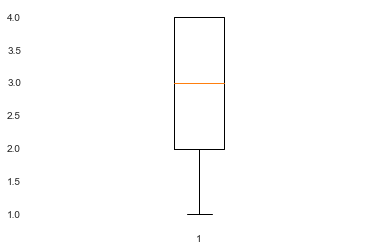

In [116]:
header = data.dtypes.index
print(header)

A = data['region']
plt.boxplot(A,0,'gD')
plt.show()

Index(['in-store', 'age', 'items', 'amount', 'region', 'Amount($)', 'Age'], dtype='object')


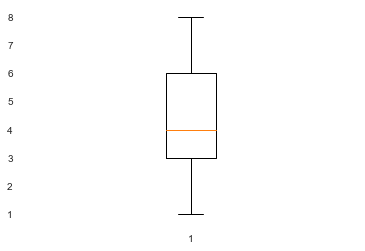

In [117]:
header = data.dtypes.index
print(header)

A = data['items']
plt.boxplot(A,0,'gD')
plt.show()

#### Stacked Column

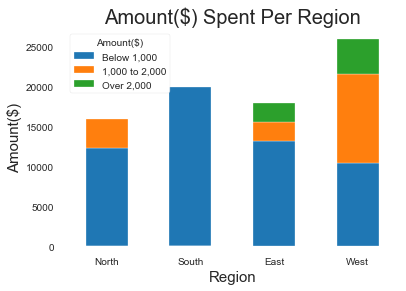

In [118]:
data.groupby(['region','Amount($)']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Amount($) Spent Per Region', fontsize = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Amount($)', fontsize = 15)
x1 = [0,1,2,3]
squad = ['North','South','East','West']
plt.xticks(x1, squad, rotation=0)

plt.show()

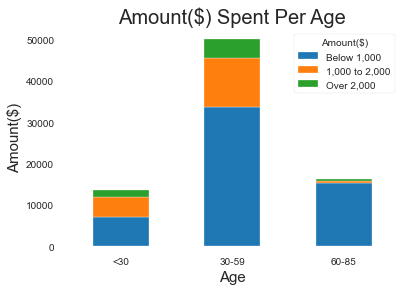

In [119]:
data.groupby(['Age','Amount($)']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Amount($) Spent Per Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Amount($)', fontsize = 15)
x1 = [0,1,2]
squad = ['<30', '30-59', '60-85']
plt.xticks(x1, squad, rotation=0)

plt.show()

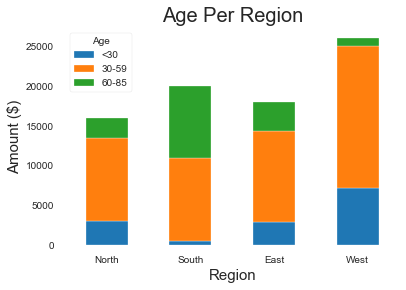

In [120]:
data.groupby(['region','Age']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Age Per Region', fontsize = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Amount ($)', fontsize = 15)
x1 = [0,1,2,3]
squad = ['North','South','East','West']
plt.xticks(x1, squad, rotation=0)

plt.show()

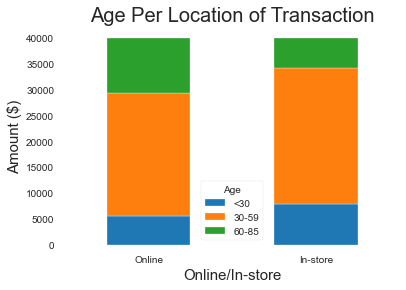

In [121]:
data.groupby(['in-store','Age']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Age Per Location of Transaction', fontsize = 20)
plt.xlabel('Online/In-store', fontsize = 15)
plt.ylabel('Amount ($)', fontsize = 15)
x1 = [0,1]
squad = ['Online','In-store']
plt.xticks(x1, squad, rotation=0)

plt.show()

#### Bar Chart

In [38]:
# Number/count of transactions per region
data.groupby('region')['amount'].count()

region
1    15997
2    19994
3    18000
4    25988
Name: amount, dtype: int64

C:\anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


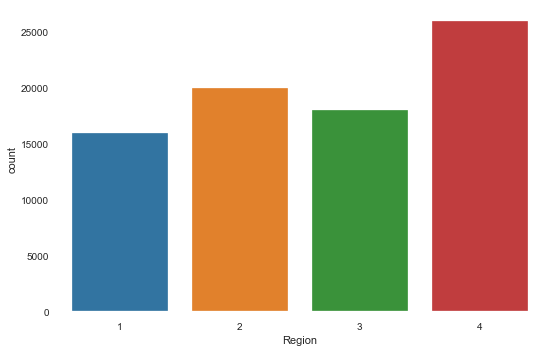

In [39]:
fg = sb.factorplot('region', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Region')

In [40]:
# Number/count of transactions per item
data.groupby('items')['amount'].count()

items
1     5699
2    11284
3    11486
4    11594
5    11233
6    11519
7    11376
8     5788
Name: amount, dtype: int64

Text(-7.325000000000003, 0.5, 'Number of Transactions')

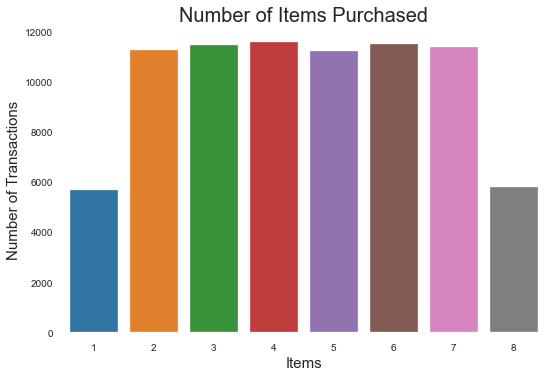

In [41]:
fg = sb.factorplot('items', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Items')

plt.title('Number of Items Purchased', fontsize = 20)
plt.xlabel('Items', fontsize = 15)
plt.ylabel('Number of Transactions', fontsize = 15)

In [42]:
#average of amount per region
data.groupby('region')['amount'].mean()

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64

In [43]:
x=np.arange(5)
print(x)

[0 1 2 3 4]


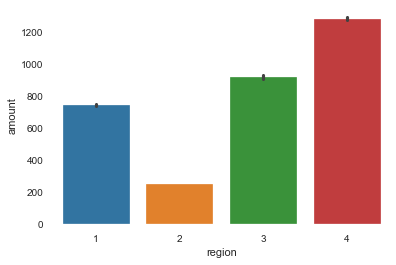

In [44]:
ax = sb.barplot(x=data['region'], y=data['amount'])

In [45]:
groupedvalues = data.groupby('region').mean().reset_index()
groupedvalues.head()

,region,in-store,age,items,amount
0,1,1.000000,43.704132,4.510283,744.990939
1,2,0.000000,56.609083,4.512804,252.097741
2,3,0.611056,45.646944,4.494000,917.969637
3,4,0.500000,38.752424,4.503771,1283.938357


[Text(0, 0, '1 - North'),
 Text(1, 0, '2 - South'),
 Text(2, 0, '3 - East'),
 Text(3, 0, '4 - West')]

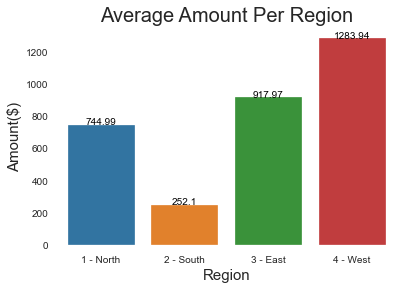

In [46]:
g =sb.barplot(x='region',y='amount',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.title('Average Amount Per Region', fontsize = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Amount($)', fontsize = 15)
g.set_xticklabels(['1 - North','2 - South','3 - East','4 - West'])

In [47]:
#average of amount per item
data.groupby('items')['amount'].mean()

items
1    825.401751
2    846.956834
3    836.594085
4    829.619594
5    833.973730
6    835.332638
7    830.026801
8    851.268593
Name: amount, dtype: float64

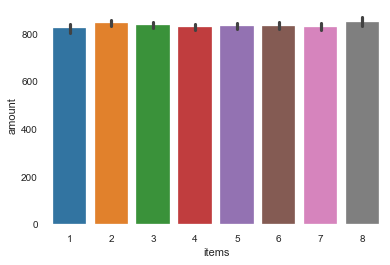

In [48]:
ax = sb.barplot(x=data['items'], y=data['amount'])

In [49]:
groupedvalues = data.groupby('items').mean().reset_index()
groupedvalues.head()

,items,in-store,age,amount,region
0,1,0.501667,45.968416,825.401751,2.690647
1,2,0.496721,45.724832,846.956834,2.679989
2,3,0.504876,45.578530,836.594085,2.681090
3,4,0.501984,45.711747,829.619594,2.652148
4,5,0.504585,45.768717,833.973730,2.679160


Text(0, 0.5, 'Amount')

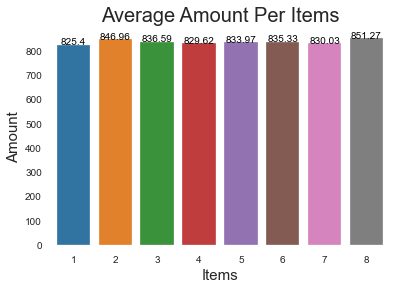

In [50]:
g =sb.barplot(x='items',y='amount',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.title('Average Amount Per Items', fontsize = 20)
plt.xlabel('Items', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)

In [51]:
# Number/count of transactions per purchase location
data.groupby('in-store')['amount'].count()

in-store
0    39989
1    39990
Name: amount, dtype: int64

C:\anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-7.325000000000003, 0.5, 'Number of Transactions')

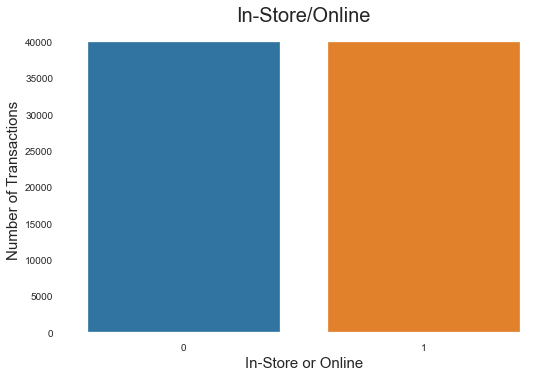

In [52]:
# 1 = In-Store 0 = Online Purchases
fg = sb.factorplot('in-store', data=data, kind='count', aspect=1.5)
fg.set_xlabels('in-store')

plt.title('In-Store/Online', fontsize = 20)
plt.xlabel('In-Store or Online', fontsize = 15)
plt.ylabel('Number of Transactions', fontsize = 15)


In [53]:
# 1 = In-Store 0 = Online Purchases
groupedvalues = data.groupby('in-store').mean().reset_index()
groupedvalues.head()

,in-store,age,items,amount,region
0,0,48.558654,4.513166,897.546576,2.824952
1,1,42.958440,4.497099,774.106421,2.524881


[Text(0, 0, '0 - Online'), Text(1, 0, '1 - In-store')]

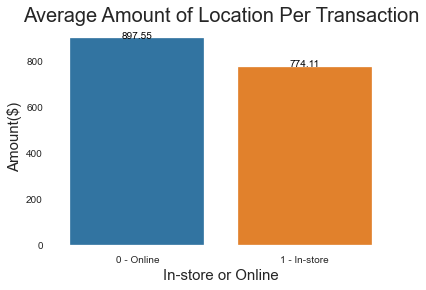

In [54]:
# 1 = In-Store 0 = Online Purchases
#Mean per transaction for in-store or Online
##Need to find out if I can sum total In-store and Online purchases
g =sb.barplot(x='in-store',y='amount',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.amount, round(row.amount,2), color='black', ha="center")
plt.title('Average Amount of Location Per Transaction', fontsize = 20)
plt.xlabel('In-store or Online', fontsize = 15)
plt.ylabel('Amount($)', fontsize = 15)
g.set_xticklabels([ '0 - Online','1 - In-store'])

### Feature Selection

#### Correlation

In [55]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


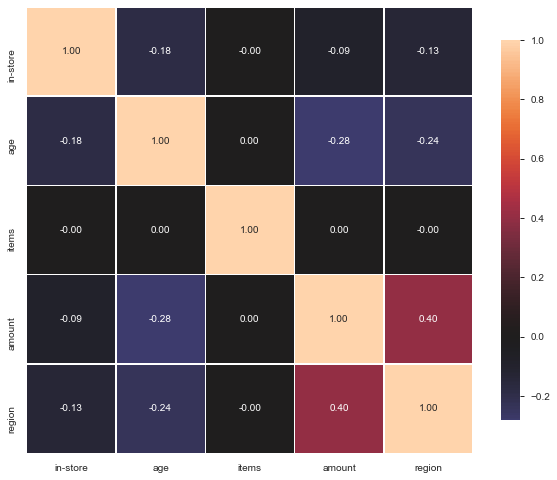

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidth=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

#### Covariance

In [57]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


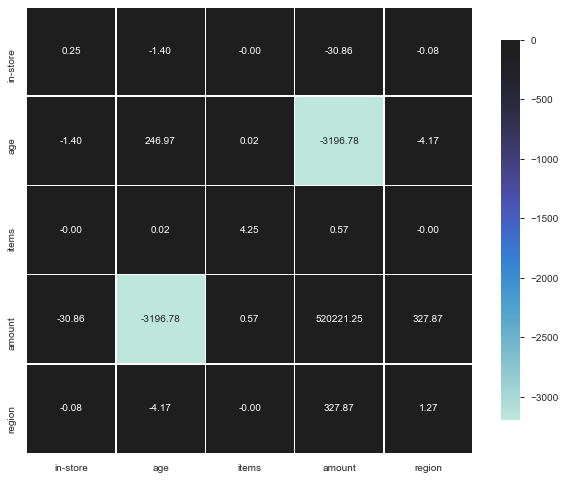

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(cov_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidth=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Train/Test Sets

#### Set Random Seed

In [59]:
seed = 123

#### Split datasets into X (Independent Variable) and y (Dependent Variable)

In [60]:
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region', 'Amount($)', 'Age'], dtype='object')

In [61]:
## 3b): set REGION as dependent variable
##removing "Region" from features/independent variables
variable_name = data.iloc[[0, 1, 2, 3]]

In [63]:
# 3b): features
X_data = data.iloc[:,[0,1,2,3]]
print('Summary of feature sample')
X_data.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [64]:
# 3b): Setting dependent target variable (REGION)
y_data = data['region']

In [65]:
# 3b): Discretize Age into 3 bins and add it to the data frame
data['age'] = pd.cut(data['age'], bins=[18,29,59,85], labels=['<30', '30-59', '60-85'])
data.head()

,in-store,age,items,amount,region,Amount($),Age
0,0,30-59,4,281.03,2,"Below 1,000",30-59
1,0,30-59,2,219.51,2,"Below 1,000",30-59
2,1,30-59,3,1525.70,4,"1,000 to 2,000",30-59
3,1,30-59,3,715.25,3,"Below 1,000",30-59
4,1,30-59,4,1937.50,1,"1,000 to 2,000",30-59


In [66]:
# 3b): Discretize amount into 3 bins and add it to the data frame
data['amount'] = pd.cut(data['amount'], bins=[0,1000,2000,3000], labels=['0-1000', '1001-2000', '2001-3000'])
data.head(10)

,in-store,age,items,amount,region,Amount($),Age
0,0,30-59,4,0-1000,2,"Below 1,000",30-59
1,0,30-59,2,0-1000,2,"Below 1,000",30-59
2,1,30-59,3,1001-2000,4,"1,000 to 2,000",30-59
3,1,30-59,3,0-1000,3,"Below 1,000",30-59
4,1,30-59,4,1001-2000,1,"1,000 to 2,000",30-59
5,0,<30,3,1001-2000,4,"1,000 to 2,000",<30
6,0,30-59,6,0-1000,2,"Below 1,000",30-59
7,1,60-85,5,0-1000,3,"Below 1,000",60-85
8,1,30-59,5,0-1000,1,"Below 1,000",30-59
9,1,30-59,3,0-1000,1,"Below 1,000",30-59


In [61]:
## 4a-4b): set IN-STORE as dependent variable
##removing "in-store" from features/independent variables
variable_name = data.iloc[[1, 2, 3, 4]]

In [64]:
# 4a-4b): features
X_data = data.iloc[:,[1,2,3,4]]
print('Summary of feature sample')
X_data.head()

Summary of feature sample


,age,items,amount,region
0,37,4,281.03,2
1,35,2,219.51,2
2,45,3,1525.70,4
3,46,3,715.25,3
4,33,4,1937.50,1


In [65]:
# 4a-4b): Setting dependent target variable (In-Store)
y_data = data['in-store']

In [66]:
# 4a-4b): Discretize Age into 3 bins and add it to the data frame
data['age'] = pd.cut(data['age'], bins=[18,29,59,85], labels=['<30', '30-59', '60-85'])
data.head()

,in-store,age,items,amount,region,Amount($),Age
0,0,30-59,4,281.03,2,"Below 1,000",30-59
1,0,30-59,2,219.51,2,"Below 1,000",30-59
2,1,30-59,3,1525.70,4,"1,000 to 2,000",30-59
3,1,30-59,3,715.25,3,"Below 1,000",30-59
4,1,30-59,4,1937.50,1,"1,000 to 2,000",30-59


In [67]:
# 4a-4b): Discretize amount into 3 bins and add it to the data frame
data['amount'] = pd.cut(data['amount'], bins=[0,1000,2000,3000], labels=['0-1000', '1001-2000', '2001-3000'])
data.head(10)

,in-store,age,items,amount,region,Amount($),Age
0,0,30-59,4,0-1000,2,"Below 1,000",30-59
1,0,30-59,2,0-1000,2,"Below 1,000",30-59
2,1,30-59,3,1001-2000,4,"1,000 to 2,000",30-59
3,1,30-59,3,0-1000,3,"Below 1,000",30-59
4,1,30-59,4,1001-2000,1,"1,000 to 2,000",30-59
5,0,<30,3,1001-2000,4,"1,000 to 2,000",<30
6,0,30-59,6,0-1000,2,"Below 1,000",30-59
7,1,60-85,5,0-1000,3,"Below 1,000",60-85
8,1,30-59,5,0-1000,1,"Below 1,000",30-59
9,1,30-59,3,0-1000,1,"Below 1,000",30-59


#### Create train and test sets

In [67]:
# 3b) Region as dv
#Train/Test Split # Split the dataset into 70% Training and 30% Test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .30, random_state = seed)


In [68]:
# 3b): for region decision tree
X_train.head()

,in-store,age,items,amount
65273,1,46,2,1912.70
11430,0,60,7,231.78
46461,0,41,7,1692.70
20823,0,41,8,390.01
52831,0,26,5,2399.80


In [69]:
# 3b): for region decision tree
y_data.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [68]:
# 4a) In-Store as dv
#Train/Test Split # Split the dataset into 60% Training and 40% Test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = .40, random_state = seed)


In [69]:
# 4a): for In-Store decision tree
X_train.head()

,age,items,amount,region
47746,68,2,158.060,1
54230,73,2,170.970,2
10689,50,5,931.480,3
75762,73,7,6.147,2
6076,21,8,1247.700,4


In [70]:
# 4b): for in-store decision tree
y_data.head()

0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64

### Modeling

#### Evaluating patterns in data using a Decision Tree (DT)

##### DV = Region

In [70]:
# 3b): DV = region
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [71]:
# performance metrics
print(accuracy_score(preds, y_test))
print(classification_report(y_test, preds))

0.6351171126114862
              precision    recall  f1-score   support

           1       0.41      0.68      0.51      4838
           2       0.90      1.00      0.95      5979
           3       0.54      0.11      0.18      5391
           4       0.65      0.70      0.67      7786

    accuracy                           0.64     23994
   macro avg       0.63      0.62      0.58     23994
weighted avg       0.64      0.64      0.60     23994



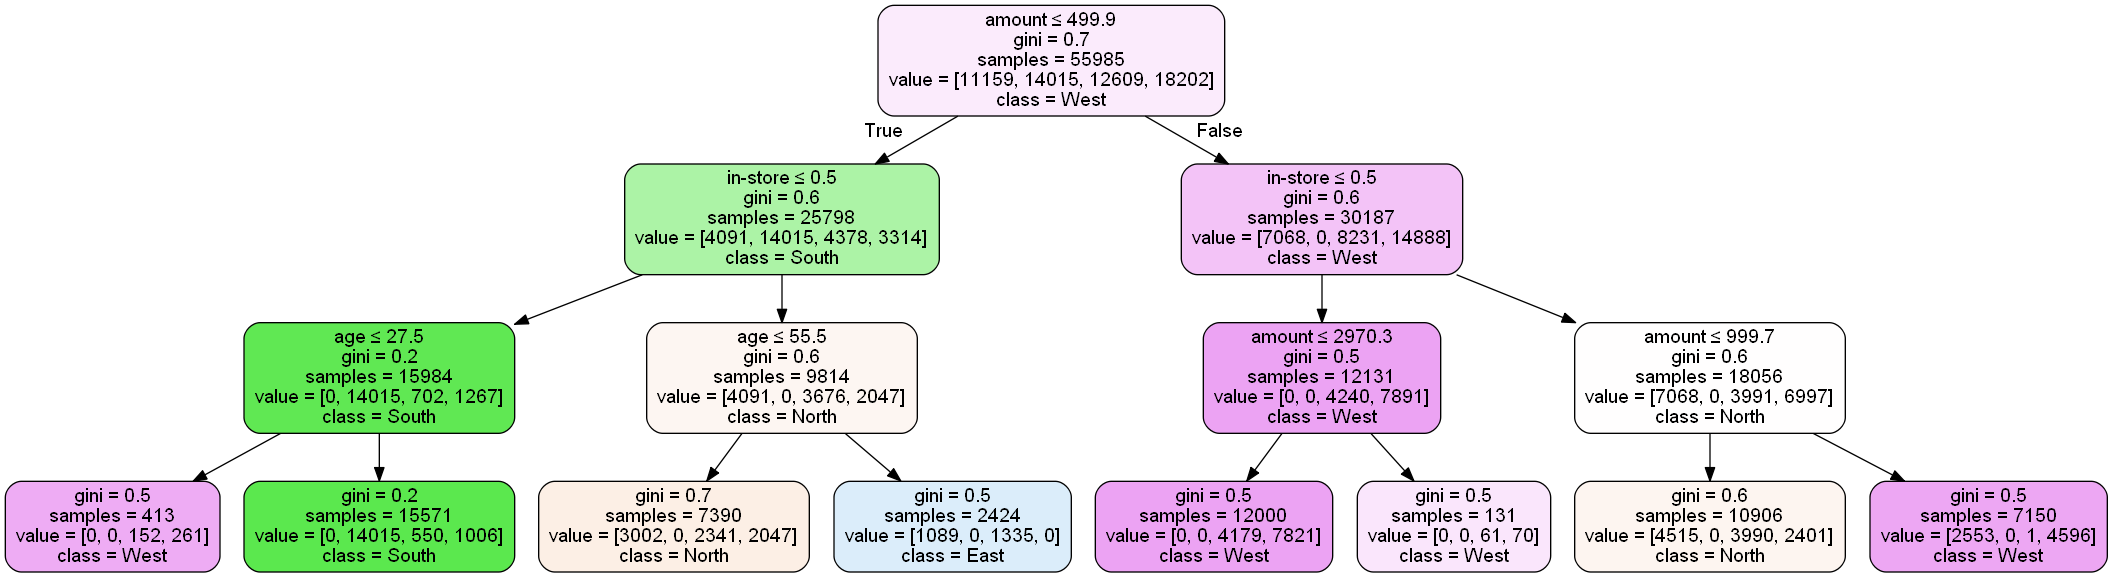

In [73]:
# specifying the region classes
# region_values = ['0','1','2','3'] 
region_values = ['North','South','East','West'] 

# Decision Tree for REGION
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X_data.columns, 
    class_names=region_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

##### DV = In-store

In [71]:
# 4a): DV = in-store
algo = DecisionTreeClassifier(max_depth=3)
model = algo.fit(X_train, y_train)
preds = model.predict(X_test)

In [72]:
# performance metrics
print(accuracy_score(preds, y_test))
print(classification_report(y_test, preds))

0.8361777944486122
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     15947
           1       0.75      1.00      0.86     16045

    accuracy                           0.84     31992
   macro avg       0.88      0.84      0.83     31992
weighted avg       0.88      0.84      0.83     31992



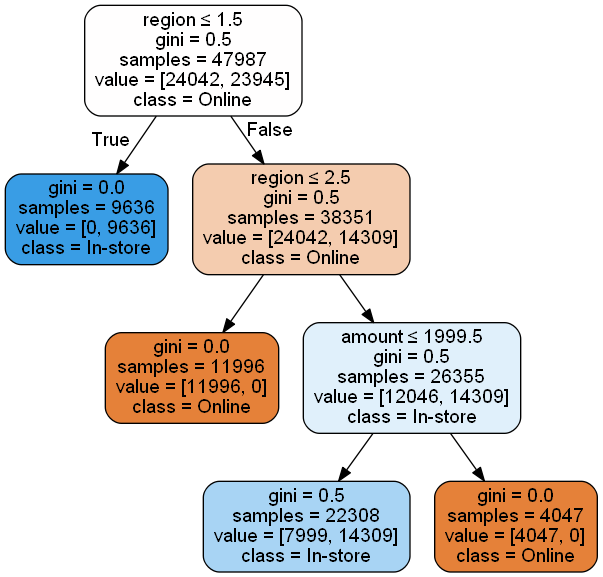

In [73]:
# specifying the in-store classes
# in-store_values = ['0','1'] 

instore_values = ['Online', 'In-store']

# Decision Tree for IN-STORE
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
    filled=True, rounded=True,
    feature_names=X_data.columns, 
    class_names=instore_values,label='all',precision=1,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Make Predictions - Region

In [74]:
# Using simple Decision Tree classifier - REGION
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.6412853213303326

In [75]:
#Region
y_pred = dt_clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[2531,    0, 1082, 1225],
       [   0, 5979,    0,    0],
       [2100,  226, 1251, 1814],
       [1701,  411,   48, 5626]], dtype=int64)

In [76]:
# Using Random Forest classifier - REGION
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.5797699424856214

In [77]:
# Using Gradient Boosting classifier - REGION
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.6417854463615904

In [78]:
# Tune Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.6428690505959823

#### Select Models

In [79]:
#DV = Region
algos_Class = []
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Gradient Boosting', GradientBoostingClassifier()))

### Make Predictions - In-Store

In [74]:
# Using simple Decision Tree classifier - In-Store
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.8662478119529883

In [75]:
y_pred = dt_clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[11674,  4273],
       [    6, 16039]], dtype=int64)

In [76]:
# Using Random Forest classifier - In-Store
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.8596524131032758

In [77]:
# Using Gradient Boosting classifier - In-Store
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.8862215553888472

In [78]:
# Tune Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.8827206801700425

#### Select Models

In [79]:
#DV = In-Store
algos_Class = []
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Gradient Boosting', GradientBoostingClassifier()))

### CV (cross-validation)

In [81]:
#Accuracy for Region
result = cross_val_score(model, X_data,y_data, cv=3, scoring='accuracy')
print(cross_val_score(model, X_data, y_data, cv=3))
print('Accuracy is: %.3f' % result.mean())

[0.63623406 0.63604651 0.63505758]
Accuracy is: 0.636


In [82]:
#DV = Region
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_data,y_data, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.5615848835422405
Random Forest Classifier 0.5849284946804052
Gradient Boosting 0.643281380474906


In [83]:
 #Set region as dv; unbinned data

for name, model in algos_Class:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model,X_data,y_data, cv=kfold, scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())
    #print(msg)

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.5615848835422405
Random Forest Classifier 0.5849284946804052
Gradient Boosting 0.643281380474906
Decision Tree Classifier 0.5650358091041948
Random Forest Classifier 0.5845784582797487
Gradient Boosting 0.6434188928154053


In [80]:
#Accuracy for In-Store
result = cross_val_score(model, X_data,y_data, cv=3, scoring='accuracy')
print(cross_val_score(model, X, y_data, cv=3))
print('Accuracy is: %.3f' % result.mean())

[0.83342086 0.83510878 0.83472748]
Accuracy is: 0.834


In [81]:
#DV = In-Store
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X_data,y_data, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.845521936487723
Random Forest Classifier 0.8600132693813386
Gradient Boosting 0.8873454123499366


In [82]:
 #Set in-store as dv; unbinned data

for name, model in algos_Class:
    kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
    result = cross_val_score(model,X_data,y_data, cv=kfold, scoring='accuracy')
    names.append(name)
    results.append(result)
    #msg = '%s: %.4f (%.4f)' % (name, result.mean(), result.std())
    #print(msg)

# print results
for i in range(len(names)):
    print(names[i],results[i].mean())

Decision Tree Classifier 0.845521936487723
Random Forest Classifier 0.8600132693813386
Gradient Boosting 0.8873454123499366
Decision Tree Classifier 0.8456970041677679
Random Forest Classifier 0.8614636418210296
Gradient Boosting 0.8868577876304479
